<a href="https://colab.research.google.com/github/vaishnavipatil29/PR-ML-Assignments/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering:
1. K-means
2. Fuzzy C-means
3. GMM
4. Practical Example (repeat for all 3)


# 1. K-means clustering 
a) Data genearation

b) Generate 2D gaussian data of 4 types each having 100 points, by taking appropriate mean and varince (example: mean :(0.5 0) (5 5) (5 1) (10 1.5), variance : Identity matrix)


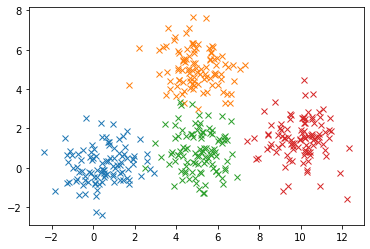

,x,y
0,0.941227,-0.330870
1,2.930771,-0.252092
2,0.609610,1.582481
3,-0.409232,-0.591637
4,0.687603,-0.329870
...,...,...
395,9.513463,2.668252
396,10.181852,4.481405
397,9.675211,1.239112
398,12.306854,0.991753


In [ ]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#mean and covariance
mean = [[0.5, 0], [5, 5], [5, 1], [10, 1.5]]
cov = [[1, 0], [0, 1]]

#storing points in a dataframe
x1 = np.empty(400)
y1 = np.empty(400)
p=0

## Data generation
for i in range(0,4):
    x, y = np.random.multivariate_normal(mean[i], cov, 100).T
    plt.plot(x, y, 'x') 
    for j in range(p,p+100):
        x1[j]=x[j-p]
        y1[j]=y[j-p]
    p=p+100
       
plt.show()

#Generated points in a dataset
df = pd.DataFrame()
df['x']=x1
df['y']=y1
df

## Cluster Initialization

a) Randomly initialize the cluster centers (any k- number of data points from the generated data)



{0: [11.48573886435173, 3.02607460630938], 1: [7.415203025886386, 2.857729829359119], 2: [6.446892150048464, 3.0622628372788387], 3: [2.6303007161308996, -1.2442572466603394]}


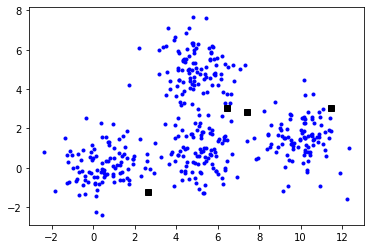

In [ ]:
# randomly initialize clusters
k=4

#assign clusters randomly
centroids= dict()
np.random.seed(5)
centroids={i:[random.uniform(-2, 12),random.uniform(-2, 4)] for i in range(k)}
#centroids={i+1:[random.randint(-2, 12),random.randint(-2, 8)] for i in range(k)}
centroids2=np.array(list(centroids.values() )) 
print(centroids)

#plot the clusters in data
plt.plot(df['x'], df['y'], '.',color='blue')
for i in range(0,4):
    plt.plot(*centroids[i],'s',color='black')
plt.show()

## Cluster assignment and re-estimation Stage 

a) Using initial/estimated cluster centers (mean $\mu_{i}$) perform cluster assignment.

b) Assigned cluster for each feature vector ($X_{j}$) can be written as:
$$arg \min_{i} ||C_{i}-X_{j}||_{2},~1 \leq i \leq K,~1\leq j \leq N$$ 
c) Re-estimation: After cluster assignment, the mean vector is recomputed as,
$$\mu_{i}=\frac{1}{N_{i}}\sum_{j \in i^{th} cluster}X_{j}$$
where $N_{i}$ represents the number of datapoints in the $i^{th}$ cluster.

d) Objective function (to be minimized):
$$Error(\mu)=\frac{1}{N}\sum_{i=1}^{K}\sum_{j \in i^{th} cluster}||C_{i}-X_{j}||_{2}$$

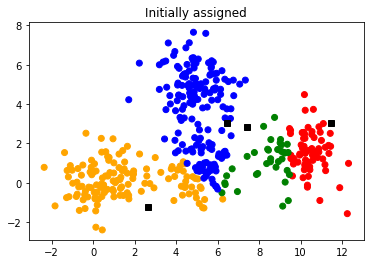

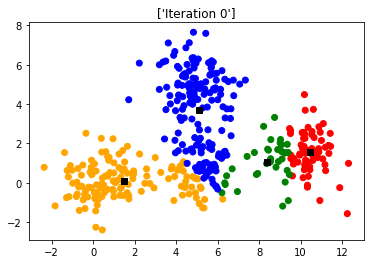

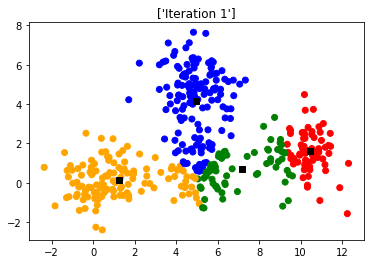

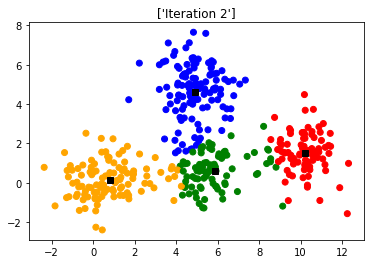

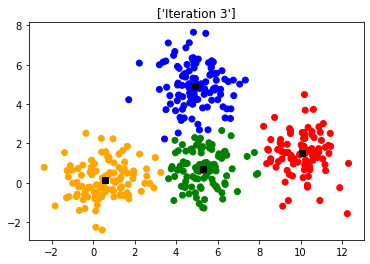

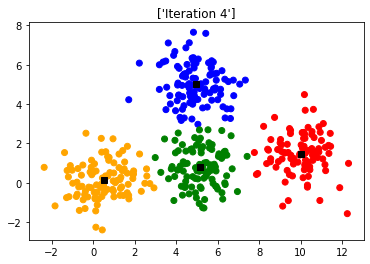

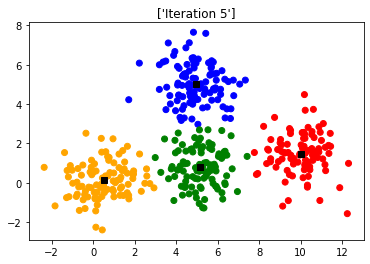

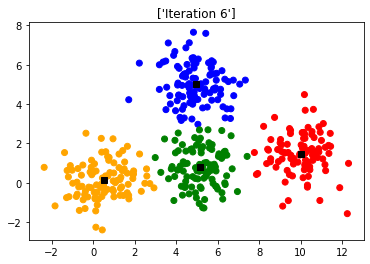

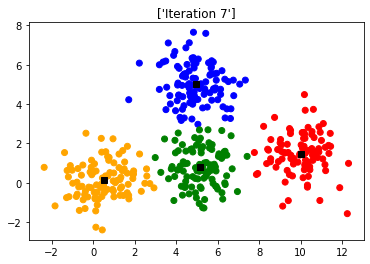

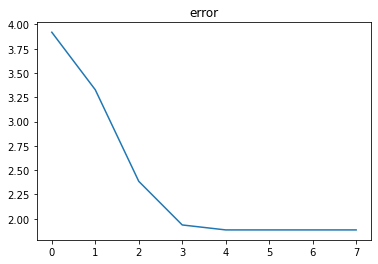

In [ ]:
colmap = {0: 'red', 1: 'green', 2: 'blue', 3: 'orange'}
import numpy.matlib

def assign_centroid(df,centroids):
    for i in range(0,4):
        #Find distance of each point from each cluster
        df[i]=np.sqrt( ((df['x']-centroids[i][0])**2) + ((df['y']-centroids[i][1])**2) )
    
    df2=df[df.columns[2:6]]
    df['closest']=df2.idxmin(axis=1)
    df['color']=df['closest'].map(lambda x:colmap[x])
    return df

###update centroid position : Mean of assigned points
def update(centroids,df):
    for i in range(0,4):
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][1]=np.mean(df[df['closest']==i]['y'])
    return centroids

def error(centroids,df):
    a=[((df[df['closest']==i]['x']-centroids[i][0])**2) + ((df[df['closest']==i]['y']-centroids[i][1])**2) for i in range(0,4)]
    tot=0
    for j in range(0,4):
        tot=tot+sum(a[j])
    error=1/400 * tot
    return error
    
error_list=[]

for g in range(0,8):
    df=assign_centroid(df,centroids)
    if(g==0):       
        plt.scatter(df['x'],df['y'],color=df['color'])
        for i in range(0,4):
            plt.plot(*centroids[i],'s',color='black')
        plt.title("Initially assigned")
        plt.show()

    ### update
    centroids=update(centroids,df)
    plt.scatter(df['x'],df['y'],color=df['color'])
    for i in range(0,4):
        plt.plot(*centroids[i],'s',color='black')
    plt.title(['Iteration {}'.format(g)])
    plt.show()
    err=error(centroids,df)
    error_list.append(err)
    df = pd.DataFrame()
    df['x']=x1
    df['y']=y1
xo=[]
for i in range(0,8):
    xo.append(i)
plt.plot(xo,error_list) 
plt.title("error")
plt.show()


# 2. GMM Clustering

## 1.  Data generation

a) Use the same data that you generated for K-means

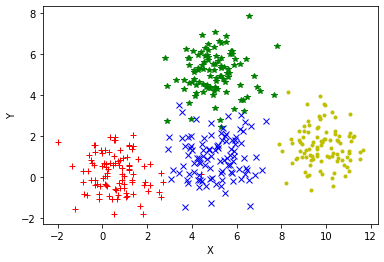

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
    
a = int(''.join(format(ord(i), 'b') for i in 'b')[:6])
np.random.seed(a),random.seed(a)

cor = np.identity(2, dtype = float)
samples1 = np.random.multivariate_normal([0.5, 0], cor, 100)
samples2 = np.random.multivariate_normal([5, 5], cor, 100)
samples3 = np.random.multivariate_normal([5, 1], cor, 100)
samples4 = np.random.multivariate_normal([10, 1.5], cor, 100)
data = np.concatenate((samples1, samples2, samples3, samples4))

#def data_plot():
col = ['+r','*g','xb','.y']
plt.plot(samples1[:, 0], samples1[:, 1], col[0],label='Custer 1')
plt.plot(samples2[:, 0], samples2[:, 1], col[1],label='Custer 2')
plt.plot(samples3[:, 0], samples3[:, 1], col[2],label='Custer 3')
plt.plot(samples4[:, 0], samples4[:, 1], col[3],label='Custer 4')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## 2. Initialization

a) Mean vector (randomly any from the given data points) ($\mu_{k}$)

b) Coveriance (initialize with (identity matrix)*max(data))  ($\Sigma_{k}$)

c) Weights (uniformly) ($w_{k}$), 
with constraint: $\sum_{k=1}^{K}w_{k}=1$

##3. Expectation stage
$$\gamma_{ik}=\frac{w_{k}P(x_{i}|\Phi_{k})}{\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})}$$

where,
$$\Phi_{k}=\{\mu_{k},\Sigma_{k}\}$$
$$\theta_{k}=\{\Phi_{k},w_{k}\}$$
$$w_{k}=\frac{N_{k}}{N}$$
$$N_{k}=\sum_{i=1}^{N}\gamma_{ik}$$
$$P(x_{i}|\Phi_{k})=\frac{1}{(2 \pi)^{d/2}|\Sigma_{k}|^{1/2}}e^{-(x_{i}-\mu_{k})^{T}\Sigma_{k}^{-1}(x_{i}-\mu_{k})}$$

## 3. Maximization stage
a) $w_{k}=\frac{N_{k}}{N}$, where  $N_{k}=\sum_{i=1}^{N}\gamma_{ik}$

b) $\mu_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}x_{i}}{N_{k}}$

c) $\Sigma_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}(x_{i}-\mu_{k})(x_{i}-\mu_{k})^{T}}{N_{k}}$

Objective function(maximized through iteration):
$$L(\theta)=\sum_{i=1}^{N}log\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})$$ 

## 4. Final run (EM algorithem)
a) initialization

b)Itterate E-M untill $L(\theta_{n})-L(\theta_{n-1}) \leq th$ 

c) Plot and see the cluster allocation at each itteration

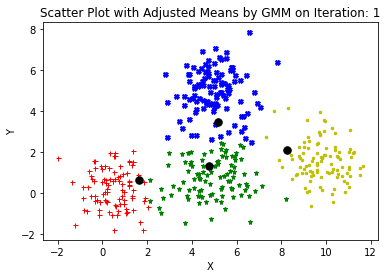

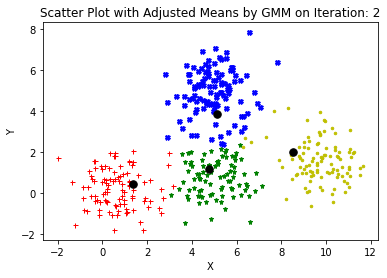

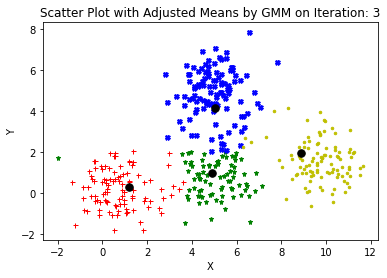

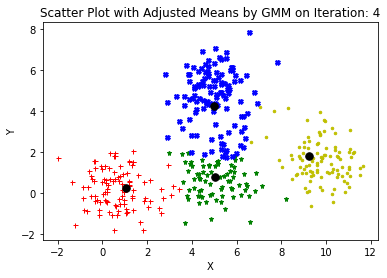

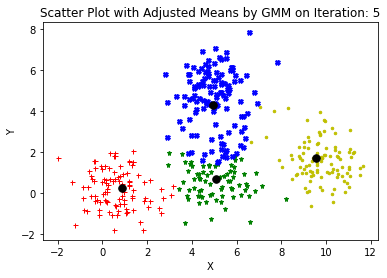

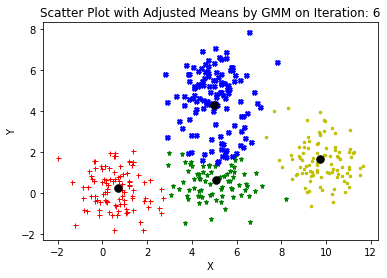

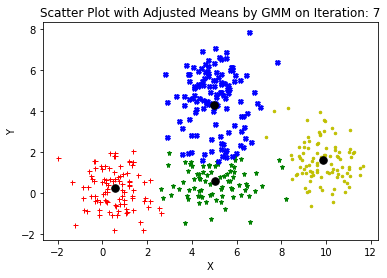

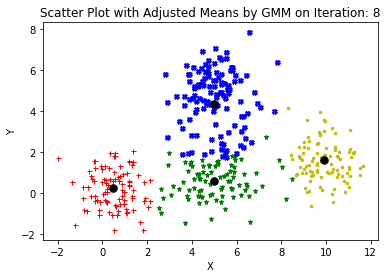

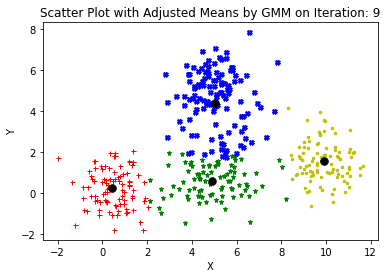

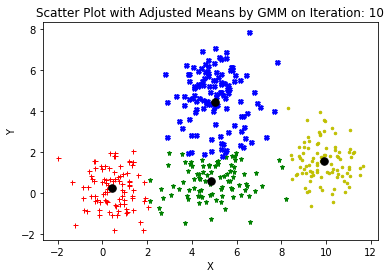

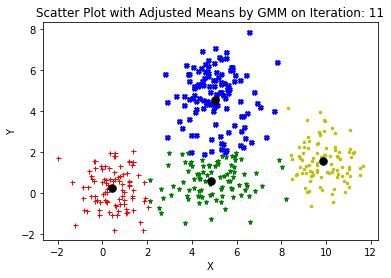

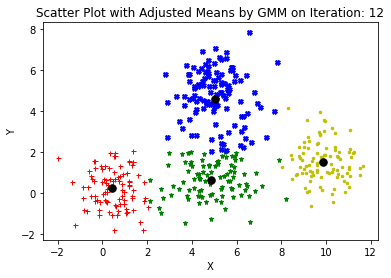

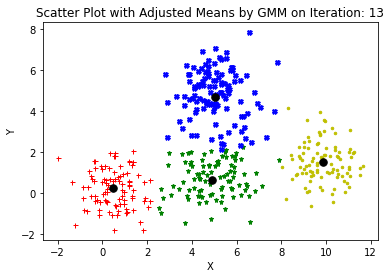

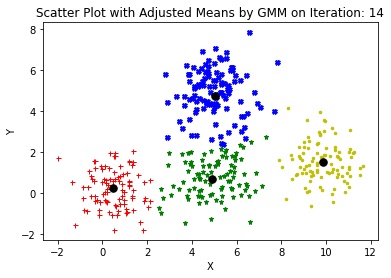

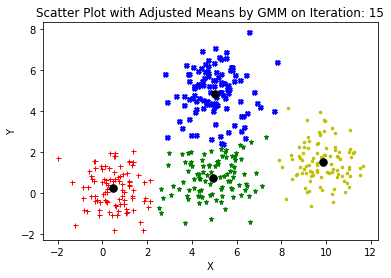

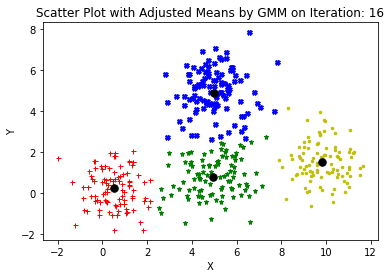

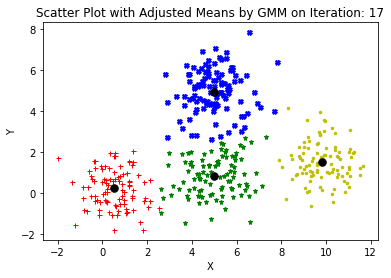

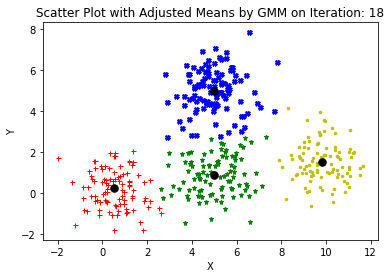

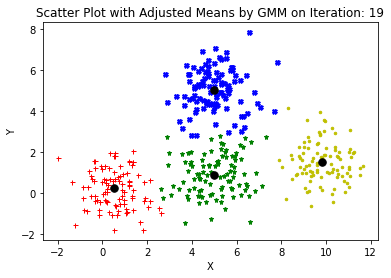

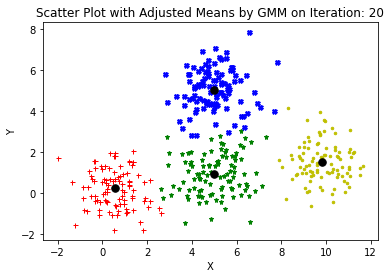

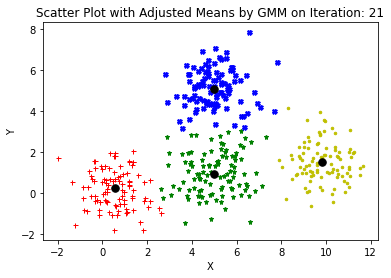

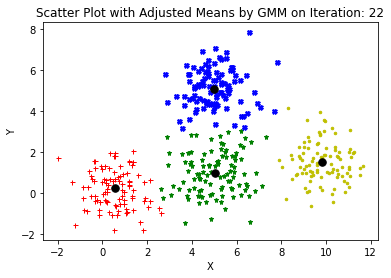

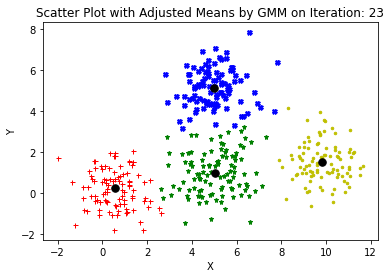

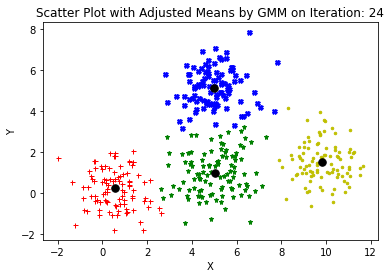

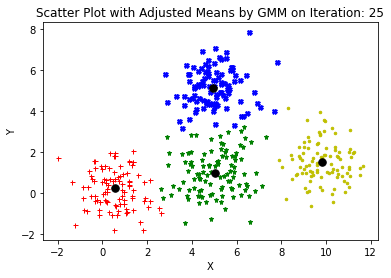

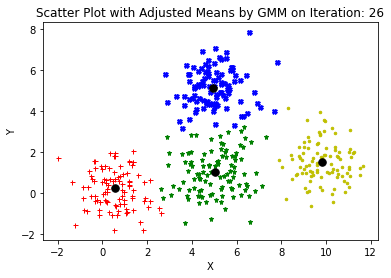

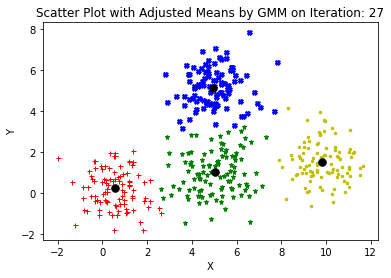

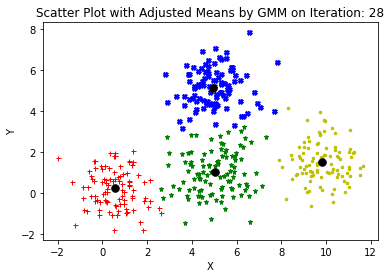

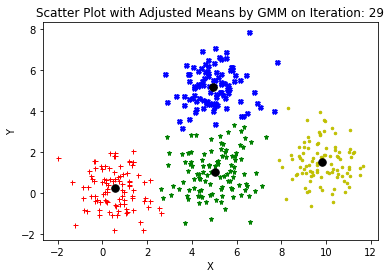

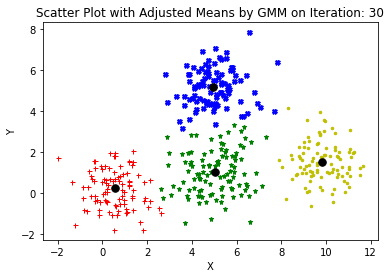

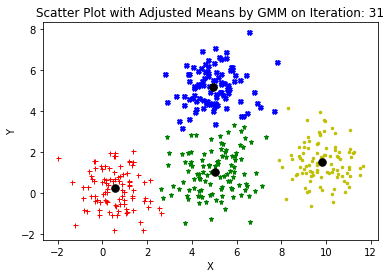

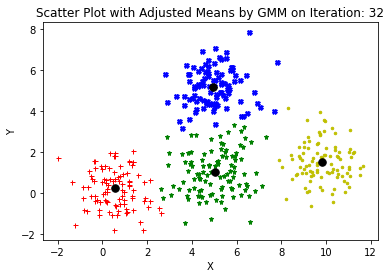

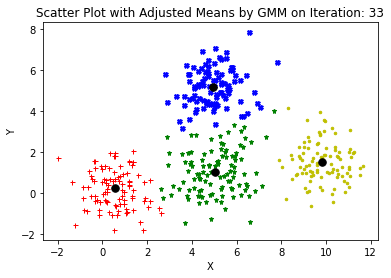

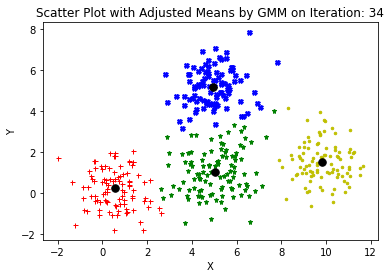

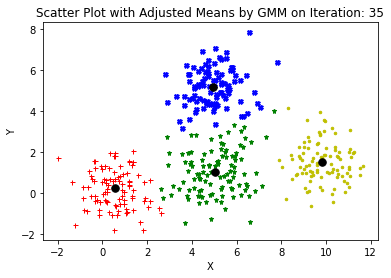

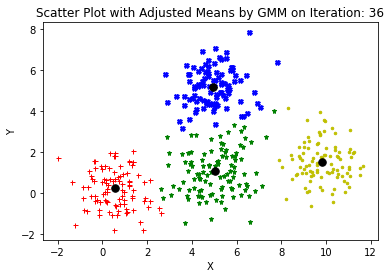

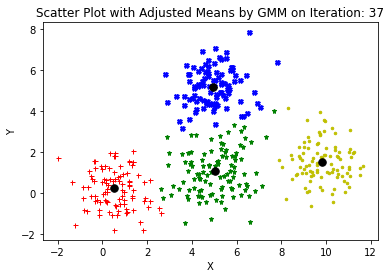

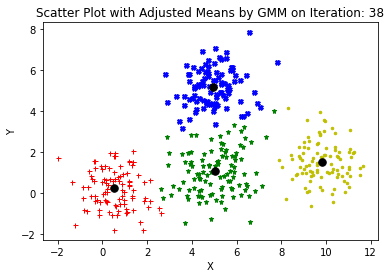

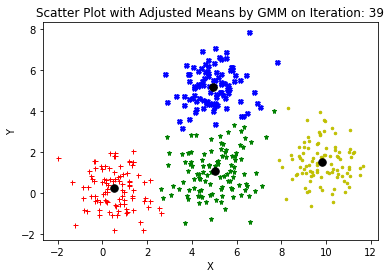

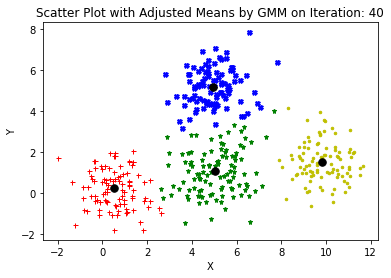

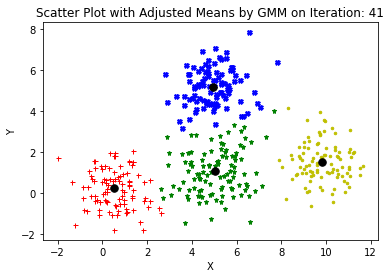

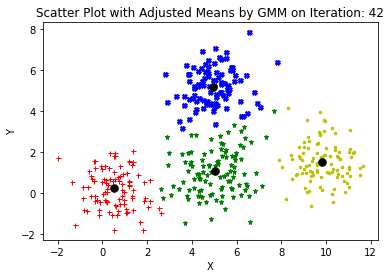

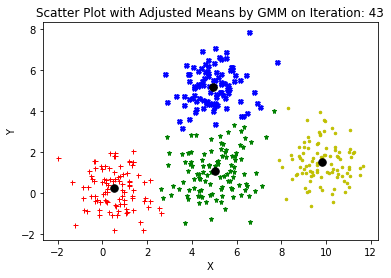

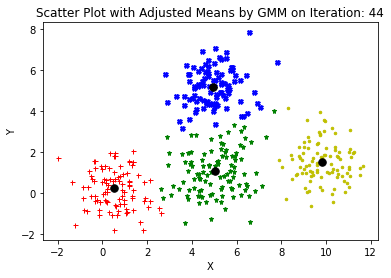

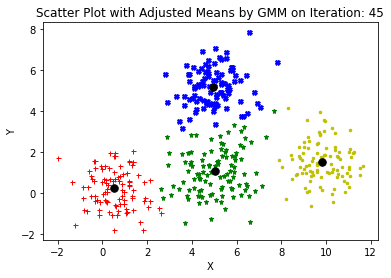

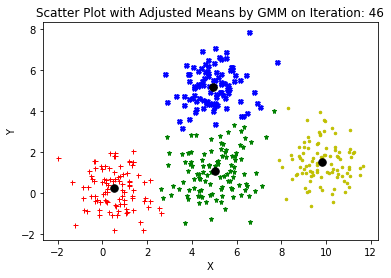

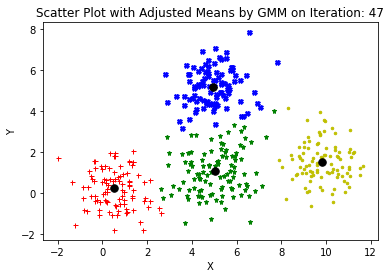

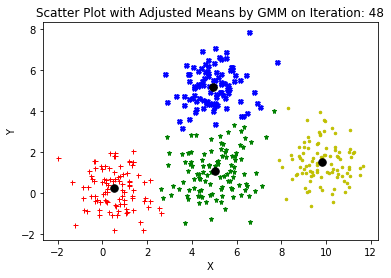

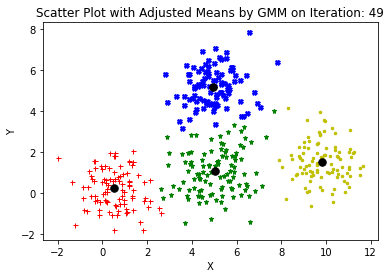

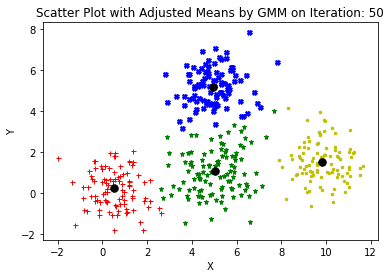

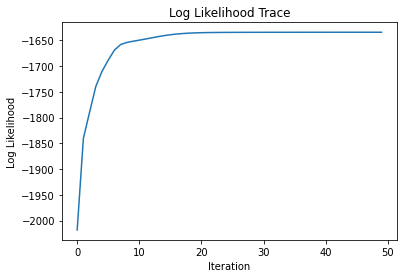

In [ ]:
from scipy.spatial.distance import euclidean as distance
from scipy.stats import multivariate_normal
class GMM:
    def __init__(self, k: int, n_iters: int, tol: float):
        self.n_components, self.n_iters,self.tol  = k, n_iters, tol 
        np.random.seed(a),random.seed(a)

    def _do_estep(self, X): 
        for k in range(self.n_components):
            prior = self.weights[k]
            likelihood = multivariate_normal(self.means[k], self.covs[k]).pdf(X)
            self.resp[:, k] = prior * likelihood

        log_likelihood = np.sum(np.log(np.sum(self.resp, axis = 1)))

        # normalize over all possible cluster assignments
        self.resp = self.resp / self.resp.sum(axis = 1, keepdims = 1)
        return log_likelihood

    def _do_mstep(self, X):
        # total responsibility assigned to each cluster, N^{soft}
        resp_weights = self.resp.sum(axis = 0)
        # weights
        self.weights = resp_weights / X.shape[0]
        # means
        weighted_sum = np.dot(self.resp.T, X)
        self.means = weighted_sum / resp_weights.reshape(-1, 1)
        # covariance
        for k in range(self.n_components):
            diff = (X - self.means[k]).T
            weighted_sum = np.dot(self.resp[:, k] * diff, diff.T)
            self.covs[k] = weighted_sum / resp_weights[k]

    def fit(self, X):
        # data's responsibility vector    
        self.resp = np.zeros((X.shape[0], self.n_components))
 
        # initialize parameters #self.covs = np.full(shape, np.cov(X.T))
        self.means = X[np.random.choice(X.shape[0], self.n_components)]
        self.weights = np.full(self.n_components, 1 / self.n_components)
        self.covs = np.full((self.n_components, X.shape[1], X.shape[1]), cor*np.max(np.asarray(X),axis=0))
        log_likelihood, self.log_likelihood_trace, clr, mrk = 0, [], ['g','b','y','r'], ['*','X','.','+']

        for i in range(self.n_iters):
            log_likelihood_new = self._do_estep(X)
            self._do_mstep(X)

            cluster_label=np.argmax(self.resp,axis=1) #Label Points
            for l in range(self.n_components):
                id=np.where(cluster_label==l)
                plt.plot(X[id,0],X[id,1],'.',color=clr[l],marker=mrk[l],markersize=5)
            plt.plot(self.means[:,0],self.means[:,1],'.',color='black',markersize=15,label="Means")
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.title('Scatter Plot with Adjusted Means by GMM on Iteration: '+str(i+1))
            plt.show()

            if abs(log_likelihood_new - log_likelihood) <= self.tol:
                #print("Converged")
                break
            #print("Difference in Log Likelihood: "+str(abs(log_likelihood_new - log_likelihood)))
            log_likelihood = log_likelihood_new
            self.log_likelihood_trace.append(log_likelihood)

        plt.plot(np.asarray(self.log_likelihood_trace))
        plt.xlabel('Iteration')
        plt.ylabel('Log Likelihood')
        plt.title('Log Likelihood Trace')
        plt.show()
gmm = GMM(k = 4, n_iters = 50, tol = 1e-4)
gmm.fit(data)

# 3. Write a code and report similar demonstration for Fuzzy c-means



(Note : Generate the data such that you can demonstare the drawback of K-means, and able to solve through GMM and fuzzy C-means, have to demonstrate clearly during viva)



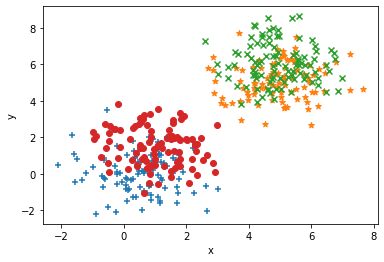

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import operator

## Data generation
d1_mean = [0.5,0]
d2_mean = [5,5]
d3_mean = [5,6]
d4_mean = [1,1.5]
cov = np.identity(2)
x1,y1= np.random.multivariate_normal(d1_mean, cov, 100).T
x2, y2 = np.random.multivariate_normal(d2_mean, cov, 100).T
x3, y3 = np.random.multivariate_normal(d3_mean, cov, 100).T
x4, y4 = np.random.multivariate_normal(d4_mean, cov, 100).T
# write your code here
d1= np.stack((x1, y1), axis=1)
d2= np.stack((x2, y2), axis=1)
d3= np.stack((x3, y3), axis=1)
d4= np.stack((x4, y4), axis=1)
dataset = (d1,d2,d3,d4)
d = np.vstack(dataset)

plt.scatter(x1,y1,marker= '+')
plt.scatter(x2,y2,marker = '*')
plt.scatter(x3,y3,marker = 'x')
plt.scatter(x4,y4,marker = 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



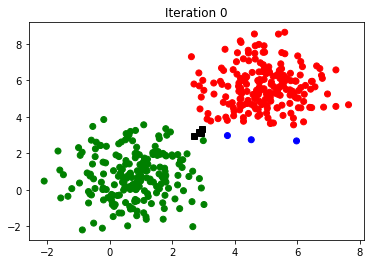

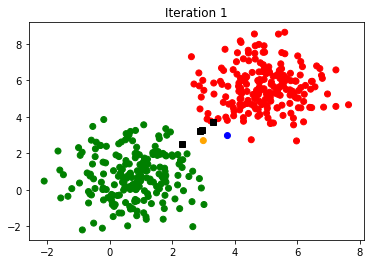

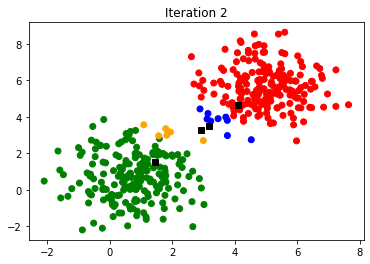

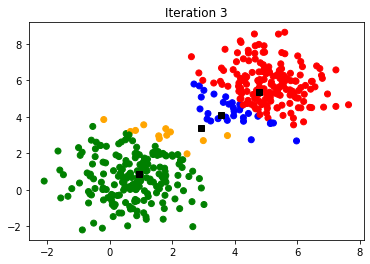

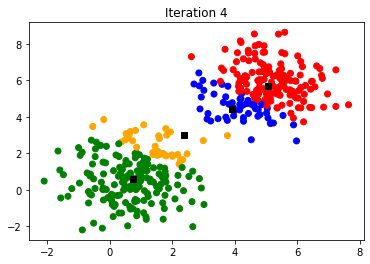

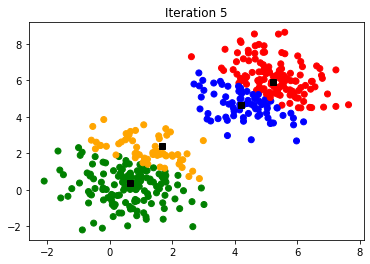

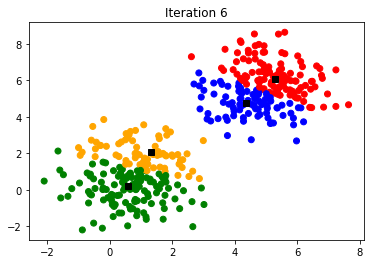

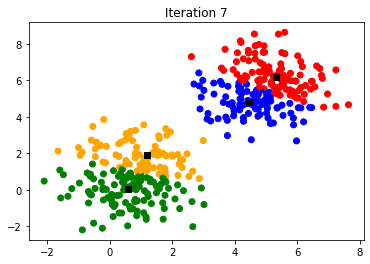

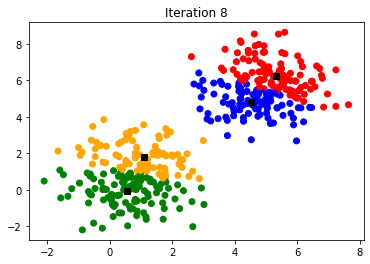

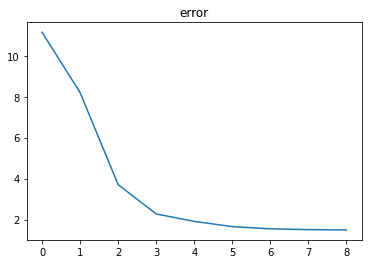

In [ ]:
import random
import operator
import math
from scipy.spatial.distance import cdist
import pandas as pd
k =4
color_map = {0:'red',1:'blue',2:'green',3:'orange'}

def initializeMembershipMatrix(n,k):
    membership_mat = list()
    for i in range(n):
        random_num_list = [random.random() for i in range(k)]
        summation = sum(random_num_list)
        #print(summation)
        temp_list = [x/summation for x in random_num_list]
        membership_mat.append(temp_list)
    #print(membership_mat)
    #print(len(membership_mat))
    return membership_mat
#membership_mat = initializeMembershipMatrix(len(d),4)
#print(pd.DataFrame(membership_mat))

def calculate_cluster_center(data,membership_mat,k,r):
    #membership_mat = [[membership_mat[j][i] for j in range(len(membership_mat))] for i in range(len(membership_mat[0]))] 
    cluster_mem_val = list(zip(*membership_mat))
    #print(pd.DataFrame(cluster_mem_val))
    cluster_centers = list()
    df = pd.DataFrame(membership_mat)
    df1 = pd.DataFrame(data)
    for j in range(k):
        x = list(cluster_mem_val[j])
        #print(x)
        xraised = [e ** r for e in x]
        #print(xraised)
        denominator = sum(xraised)
        temp_num = list()
        for i in range(len(data)):
            data_point = list(df1.iloc[i])
            #print(data_point)
            prod = [xraised[i] * val for val in data_point]
            temp_num.append(prod)
        numerator = map(sum, zip(*temp_num))
        center = [z/denominator for z in numerator]
        cluster_centers.append(center)
        #print(cluster_centers)
    return cluster_centers
#cluster_centers = calculate_cluster_center(d,membership_mat,4,2)
#print(pd.DataFrame(cluster_centers))


def update_membership_values(d,membership_mat, cluster_centers,k,r):
   power = float(2 / (r - 1))
   temp = cdist(d, cluster_centers) ** power
   denominator_ = temp.reshape((d.shape[0], 1, -1)).repeat(temp.shape[-1], axis=1)
   denominator_ = temp[:, :, np.newaxis] / denominator_

   return 1 / denominator_.sum(2)
    
#membership_mat = update_membership_values(d,membership_mat, cluster_centers,4,2)
#print(pd.DataFrame(membership_mat))


def get_clusters(membership_mat):
    cluster_labels = list()
    for i in range(len(membership_mat)):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(membership_mat[i]))
        cluster_labels.append(idx)
    return cluster_labels
#cluster_labels= get_clusters(membership_mat)
#print(pd.DataFrame(cluster_labels))

def error(df,centroids):
  err = 0
  a =[((df[df['cluster']==c][0]-centroids[c][0])**2) + ((df[df['cluster']==c][1]-centroids[c][1])**2) for c in range(4)]
  #print(a)
  for i in range(len(a)):
    err = err + sum(a[i])
  return err/len(df) 

def fuzzyCMeansClustering(MAX_ITER):
    # Membership Matrix
    membership_mat = initializeMembershipMatrix(len(d),4)
    # return membership_mat, _
    curr = 0
    error_list = []
    while curr <= MAX_ITER:
        cluster_centers = calculate_cluster_center(d,membership_mat,4,2)
        membership_mat = update_membership_values(d,membership_mat, cluster_centers,4,2)
        cluster_labels = get_clusters(membership_mat)
        #print(pd.DataFrame(cluster_centers))
        #print(cluster_labels)
        df = pd.DataFrame(d)
        df['cluster']=cluster_labels
        df['color']=df['cluster'].map(lambda x:color_map[x])
        plt.scatter(df[0],df[1],color = df['color'])
        for c in range(0,k):
          plt.plot(*cluster_centers[c],'s',color='black')
        plt.title('Iteration {}'.format(curr))
        plt.show()
        curr += 1
        err=error(df,cluster_centers)
        error_list.append(err)
    #print(membership_mat)
    return cluster_labels, cluster_centers,error_list
labels, centers,error_list = fuzzyCMeansClustering(8)
xo=[]
for i in range(9):
    xo.append(i)
plt.plot(xo,error_list) 
plt.title("error")
plt.show() 
#centers = np.array(centers)
#print(centers.shape)
#print("\n".join(centers))

# 8. Hierarchical Clustering

Hierarchical clustering is an unsupervised clustering technique which groups together the unlabelled data of similar characteristics.

There are two types of hierarchical clustering:


*   Agglomerative Clustering
*   Divisive Clustering

**Agglomerative Clustering:** 

 In this type of hierarchical clustering all data set are considered as indivisual cluster and at every iterations clusters with similar characteristics are merged to give bigger clusters. This is repeated untill one single cluster is reached. It is also called bottem-top approach.


**Divisive Clustering:**

It is an opposite of Agglomerative clustering. In this we start from one cluster which contains all data points in one.  Iteratively we separate all the cluster of points which aren't similar in characteristics. It is also called top-bottom approach.



## Agglomerative Clustering:

Lets start with some domy example :

X=$[x_1,x_2,...,x_5]$, with

$x_1=\begin{bmatrix} 1\\1\end{bmatrix}$, $x_2=\begin{bmatrix} 2\\1\end{bmatrix}$, $x_3=\begin{bmatrix} 5\\4\end{bmatrix}$, $x_4=\begin{bmatrix} 6\\5\end{bmatrix}$, $x_5=\begin{bmatrix} 6.5\\6\end{bmatrix}$

**Steps to perform Agglomerative Clustering:**





1.   Compute Distance matrix ($N \times N$ matrix, where $N$ number of vectors present in the dataset):
$D(a,b)=||x_{a}-x_{b}||_{2}$
2.   Replace the diagonal elements with $inf$ and find the index of the minimum element present in the distance matrix (suppose we get the location $(l,k)$).
3. Replace $x_{min(l,k)}=.5\times[x_{l}+x_{m}]$ and delete $x_{max(l,m)}$ vector from $X$(i.e now $(N=N-1)$), 

**repeat from step 1 again untill all the vectors combined to a single cluster.**





In [ ]:
import numpy as np
def Euclidian_Dist(x,y):
  dist = []
  dist = np.linalg.norm(x-y)
  return dist #write your code here

def Dist_mat(X):
  s=(m,m)
  Dist_mat = np.zeros(s)
  for i in range(Dist_mat.shape[0]):
    for j in range(Dist_mat.shape[0]):
      if i!=j:
        Xt=X.transpose()
        Dist_mat[i,j] = np.round(Euclidian_Dist(Xt[i],Xt[j]),1)
      else:
        Dist_mat[i,j] = np.inf
     
  return Dist_mat
  
code=[]
def combine(Dist_mat,X):
  # Find index of minimum value from 2D numpy array
  result = np.where(Dist_mat == np.min(Dist_mat))
  # zip the 2 arrays to get the exact coordinates
  listOfCordinates = list(zip(result[0], result[1]))
  (l,k)=listOfCordinates[0]
  
  xl = [sub[l] for sub in X] 
  xk = [sub[k] for sub in X]
  xlk= np.array([xl,xk])
  
  code.append([l+1,k+1])
  print("Vector of X to be combined:",[l+1,k+1])
  Xl=np.sum(xlk, axis = 0)/2
  X[:,l] = Xl
  newX=(np.delete(X, [k], 1))
  return newX,code
import numpy as np
X=np.array([[1,1],[2,1],[5,4],[6,5],[6.5,6]])
X=X.transpose()
m=len(X[0])
while m>1:
  print(X)
  distmatrix=Dist_mat(X)
  print(distmatrix)
  [X,code]=combine(distmatrix,X)
  m=len(X[0])
  print("Mean of clusters after every iteration:")
print(X)
print("Cluster combination order:",code)

[[1.  2.  5.  6.  6.5]
 [1.  1.  4.  5.  6. ]]
[[inf 1.  5.  6.4 7.4]
 [1.  inf 4.2 5.7 6.7]
 [5.  4.2 inf 1.4 2.5]
 [6.4 5.7 1.4 inf 1.1]
 [7.4 6.7 2.5 1.1 inf]]
Vector of X to be combined: [1, 2]
Mean of clusters after every iteration:
[[1.5 5.  6.  6.5]
 [1.  4.  5.  6. ]]
[[inf 4.6 6.  7.1]
 [4.6 inf 1.4 2.5]
 [6.  1.4 inf 1.1]
 [7.1 2.5 1.1 inf]]
Vector of X to be combined: [3, 4]
Mean of clusters after every iteration:
[[1.5  5.   6.25]
 [1.   4.   5.5 ]]
[[inf 4.6 6.5]
 [4.6 inf 2. ]
 [6.5 2.  inf]]
Vector of X to be combined: [2, 3]
Mean of clusters after every iteration:
[[1.5   5.625]
 [1.    4.75 ]]
[[inf 5.6]
 [5.6 inf]]
Vector of X to be combined: [1, 2]
Mean of clusters after every iteration:
[[3.5625]
 [2.875 ]]
Cluster combination order: [[1, 2], [3, 4], [2, 3], [1, 2]]


In [ ]:
import numpy as np
X=np.array([[1,1],[2,1],[5,4],[6,5],[6.5,6]])
X=X.transpose()
## velidate from inbuilt Dendogram

import plotly.figure_factory as ff
lab=np.linspace(1,X.shape[1],X.shape[1])
fig = ff.create_dendrogram(X.T, labels=lab)
fig.update_layout(width=800, height=300)
fig.show()

## Divisive clustering:

It is a top down approach of hierarchial clustering

Lets start with some domy example :

X=$[x_1,x_2,...,x_5]$, with

$x_1=\begin{bmatrix} 1\\1\end{bmatrix}$, $x_2=\begin{bmatrix} 2\\1\end{bmatrix}$, $x_3=\begin{bmatrix} 5\\4\end{bmatrix}$, $x_4=\begin{bmatrix} 6\\5\end{bmatrix}$, $x_5=\begin{bmatrix} 6.5\\6\end{bmatrix}$



1.   Find the biggest cluster (having highest diameter), initially the single cluster is the biggest cluster.

$$Diameter_{cluster}=\max_{i,j}||x_{i}-x_{j}||_{2}$$

$i,j$ will move over all the elements in the cluster.

2.  find the splinter element of the cluster by using the maximum average distance between the other elements. 
$$d_{k}=\frac{1}{N-1}\sum_{i=1}^{N}||x_{k}-x_{i}||_{2}$$
$splinter-group-element=arg \max_{1 \leq k \leq N} (d_{k})$

repeat the same and assign element to the splinter group untill the differance between average incluster distance and average splinter group distance of each element turns negative.

$$d_{avgsplint_{k}}=\frac{1}{M-1}\sum_{i=1}^{M}||x_{k}-x_{i}||_{2}$$

Stop: $$d_{k}-d_{avgsplint_{k}}<0$$
 and assign the splinter group as a new cluster.

 3. Repeat the step 1 and 2 untill each cluster have only one element.

 4.**Plot the cluster split with respect to their diameter** 












In [ ]:
import numpy as np
def Euclidian_Dist(x,y):
  dist = []
  dist = np.linalg.norm(x-y)
  return dist #write your code here

def Dist_mat(X):
  s=(num_points,num_points)
  Dist_mat = np.zeros(s)
  for i in range(Dist_mat.shape[0]):
    for j in range(Dist_mat.shape[0]):
      if i!=j:
        Xt=X.transpose()
        Dist_mat[i,j] = np.round(Euclidian_Dist(Xt[i],Xt[j]),1)
      else:
        Dist_mat[i,j] = 0
  return Dist_mat

def get_biggest_cluster(X,num_points):
  d = np.zeros(shape = (num_points, num_points))
  for i in range(num_points):
    for j in range(num_points):
      d[i][j] = Euclidian_Dist(X[:, i], X[:, j])
  diameter = d.max()
  sum = np.zeros(num_points)
  for i in range(num_points):
    sum[i] = d[i].sum()
  max_cluster_ind = np.argmax(sum)
    # index having max diameter
  return max_cluster_ind
# Implement Divisive Clustering 
import numpy as np
X = np.array([[1,1], [2,1], [5,4], [6,5], [6.5,6]])
X = X.transpose() # Shape after transpose: [2, 5]
num_points = X.shape[1]
print(f'X:\n {X}')
print("Initial Number of clusters: 1")
#write your code here
clusters = 1
finalLevel = 1#each element into a cluster
remainingClusters = []
while(X.shape[1] != finalLevel):
  splinter = []
  num_points = X.shape[1]
  argmaxsum=get_biggest_cluster(X,num_points)
  print("Biggest cluster ind is: ", argmaxsum)
  X1 = []
  for i in range(num_points):
    if i != argmaxsum:
      X1.append(X[:, i])
  X1 = np.array(X1)
  X1 = X1.transpose()
  print("Points in the biggest cluster is: \n", X1)
  print("Shape: ", X1.shape)
  splinter.append(X[:, argmaxsum])
  remainingClusters.append(X[:, argmaxsum])
  print("Splinter: \n", np.array(splinter))
  print("Shape: ", np.array(splinter).transpose().shape)
  print("Remaining Clusters: \n", np.array(remainingClusters).transpose())
  clusters = clusters + 1
  print("No. of clusters: ", clusters)
  X = X1

X:
 [[1.  2.  5.  6.  6.5]
 [1.  1.  4.  5.  6. ]]
Initial Number of clusters: 1
---------------- Iteraion - 1 -------------------
Biggest cluster ind is: 0
Biggest Cluster is: 
 [[1.  2.  5.  6.  6.5]
 [1.  1.  4.  5.  6. ]]
0
Cluster: 
 [[2.  5.  6.  6.5]
 [1.  4.  5.  6. ]] 
 Shape: (2, 4)
Splinter: 
 [[1.]
 [1.]] 
 Shape: (2, 1)
New member added to splinter of index 0 and new member is 
 [[2.]
 [1.]]
New cluster shape is (2, 3) 
 [[5.  6.  6.5]
 [4.  5.  6. ]]
New splinter shape is (2, 2) 
 [[1. 2.]
 [1. 1.]]
Final splinter and cluster shapes: (2, 2), (2, 3)
New num of clusters after splitting is: 2
[[5.  6.  6.5]
 [4.  5.  6. ]],
[[1. 2.]
 [1. 1.]],
---------------- Iteraion - 2 -------------------
Biggest cluster ind is: 0
Biggest Cluster is: 
 [[5.  6.  6.5]
 [4.  5.  6. ]]
0
Cluster: 
 [[6.  6.5]
 [5.  6. ]] 
 Shape: (2, 2)
Splinter: 
 [[5.]
 [4.]] 
 Shape: (2, 1)
Final splinter and cluster shapes: (2, 1), (2, 2)
New num of clusters after splitting is: 3
[[1. 2.]
 [1. 1.]],
[[6

In [ ]:
import numpy as np
X=np.array([[1,1],[2,1],[5,4],[6,5],[6.5,6]])
X=X.transpose()
## velidate from inbuilt Dendogram

import plotly.figure_factory as ff
lab=np.linspace(1,X.shape[1],X.shape[1])
fig = ff.create_dendrogram(X.T, labels=lab)
fig.update_layout(width=800, height=300)
fig.show()

## 4. Practical Example



## Using K-means

a) Data preparation




1. Load Mnist data
2. Take only two class '1' and '5'




In [ ]:
from google.colab import drive
drive.mount('/gdrive')
!pip install idx2numpy

Mounted at /gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Image: (60000, 28, 28)
Labels: (60000,)
(12163, 784)


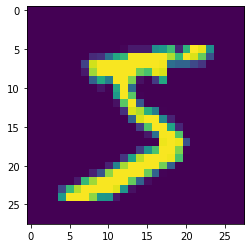

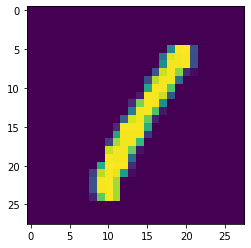

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

file1='/content/drive/My Drive/Clustering/train-images.idx3-ubyte'
file2='/content/drive/My Drive/Clustering/train-labels.idx1-ubyte'

import idx2numpy

Images= idx2numpy.convert_from_file(file1)
Labels= idx2numpy.convert_from_file(file2)

# write you code here

print('Image: ' + str(Images.shape))
print('Labels: ' + str(Labels.shape))

#Images = Images.reshape((Images.shape[0], Images.shape[1]*Images.shape[1]))
images=[]
labels=[]

for i in range(0,len(Labels)):
  if(Labels[i]==1 or Labels[i]==5):
    images.append(Images[i].flatten())
    labels.append(Labels[i])

images=np.array(images)
print(images.shape)
for i in range(2):
  plt.figure()
  plt.imshow(images[i].reshape((28, 28)), cmap='viridis')
  plt.show()

          

(11552, 784)
(11552,)
(11552, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


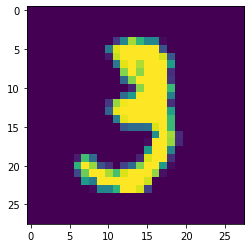

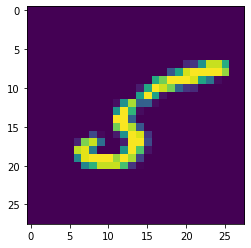

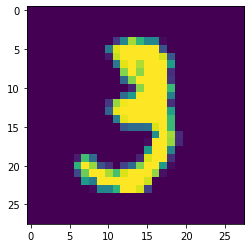

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

file1='/gdrive/My Drive/Machine learning workshop blr/Colab_notebooks/train-images.idx3-ubyte'
file2='/gdrive/My Drive/Machine learning workshop blr/Colab_notebooks/train-labels.idx1-ubyte'

import idx2numpy

Images= idx2numpy.convert_from_file(file1)
labels= idx2numpy.convert_from_file(file2)

# write you code here

(6742, 784) (5421, 784) (12163, 784)


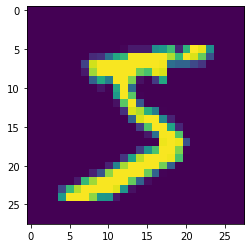

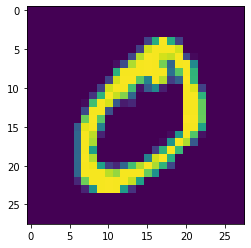

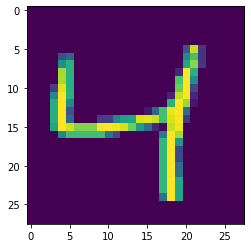

In [ ]:
file1='/content/drive/My Drive/Clustering/train-images.idx3-ubyte'
file2='/content/drive/My Drive/Clustering/train-labels.idx1-ubyte'


Images= idx2numpy.convert_from_file(file1)
labels= idx2numpy.convert_from_file(file2)
Images = Images.reshape((Images.shape[0], Images.shape[1]*Images.shape[1]))

class_1 = Images[labels == 1]
class_5 = Images[labels == 5]
X = np.concatenate([class_1, class_5], axis=0)

print(class_1.shape, class_5.shape, X.shape)
for i in range(3):
  plt.figure()
  plt.imshow(Images[i].reshape((28, 28)), cmap='viridis')
  plt.show()




2. Write a function of Kmeans as written earlier

In [ ]:
centers=np.array(random.choices(X,k=2))
centers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
# k-means
def euclidean(a,b):
    return np.linalg.norm(a-b)



def K_means_clustering(X,K=2,itr,eps):

  # randomly initialize clusters
  k=2
  centroid=np.array(random.choices(X,k=2))
  total=x.shape
  dist_1=np.zeros(total[0])  #Distance of all points from cluster : k=0
  dist_2=np.zeros(total[0])  #Distance of all points from cluster : k=1
  belongs_to=np.zeros(total[0])  #Cluster to which the row belongs to
  c_old=np.zeros(centroid.shape) #for storing old centroids
  mean=np.zeros(centroid.shape) #to store mean f all points in a cluster
  error=euclidean(centroid,c_old) #to check if the centroids have not changed, so that the loop can terminated
  
  for n in range(itr):
  # assignment stage
   # write your code here
    

    for m in range(0,15):
      for i in range(0,total[0]):
          #For all the points(rows) in the dataset, calculated the distance between the centroid
          dist_1[i] = euclidean(x[i],centroid[0])
          dist_2[i] = euclidean(x[i],centroid[1])
          if (dist_1[i]>dist_2[i]):
              belongs_to[i]=0
          else:
              belongs_to[i]=1
      c_old=copy.deepcopy(centroid)
      #Calculate means of all points of a particular cluster
      for i in range(len(belongs_to)):
          if belongs_to[i]==0:
              mean[0][0]=np.mean(x[i][0])
              mean[0][1]=np.mean(x[i][1])
          else:
              continue
      #Thus, mean[0] will be the new centroid for cluster 0
      for i in range(len(belongs_to)):
          if belongs_to[i]==1:
              mean[1][0]=np.mean(x[i][0])
              mean[1][1]=np.mean(x[i][1])
          else:
              continue

      centroid[0]=mean[0]
      centroid[1]=mean[1]
      error=euclidean(centroid,c_old)
      if error==0:
          print(belongs_to)
      

3. Call the K-means function and plot the mean vectors of the cluster

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44


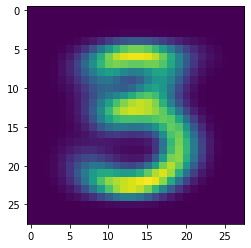

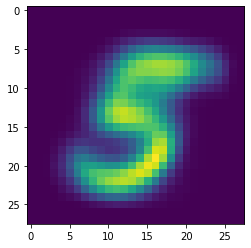

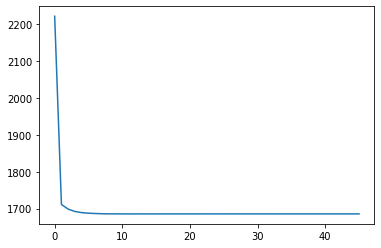

In [ ]:
DAL,cents,error=K_means_clustering(data,2,200,10**(-20))

plt.imshow(np.reshape(cents[0,:],(28,28)))
plt.figure()
plt.imshow(np.reshape(cents[1,:],(28,28)))

plt.figure()
plt.plot(error)



# 5. Perform the same task for GMM and fuzzy c-means

In [ ]:
d = X
labels, centers,error_list = fuzzyCMeansClustering(1)


# 6. Repeat the same for 3 class and perform the K-means, GMM and Fuzzy c-means clustering

# 7. Perform DBSCAN and show the advantages of DBSCAN over model and distance based clustering. 

expected: (should visualize the cluster pattern that Model and distance based clustering can not able to capture but can be captured through DBSCAN)

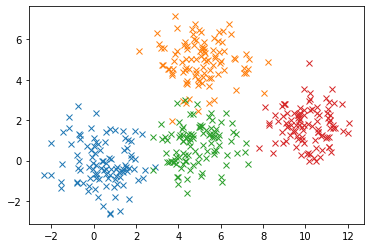

,x,y
0,0.568253,-0.131790
1,-2.010280,0.852479
2,1.116148,-0.311606
3,0.943504,-1.307079
4,0.756571,-0.730018
...,...,...
395,11.076108,2.099670
396,9.713293,2.326348
397,9.585077,1.222857
398,9.708792,1.966610


In [ ]:
mean = [[0.5, 0], [5, 5], [5, 1], [10, 1.5]]
cov = [[1, 0], [0, 1]]

#storing points in a dataframe
x1 = np.empty(400)
y1 = np.empty(400)
p=0

## Data generation
for i in range(0,4):
    x, y = np.random.multivariate_normal(mean[i], cov, 100).T
    plt.plot(x, y, 'x') 
    for j in range(p,p+100):
        x1[j]=x[j-p]
        y1[j]=y[j-p]
    p=p+100
       
plt.show()

#Generated points in a dataset
df = pd.DataFrame()
df['x']=x1
df['y']=y1
df

In [ ]:
import queue
#DBscan

X = df.values
NOISE = 0
UNASSIGNED = 0
core=-1
edge=-2
def neighbor_points(data, pointId, radius):
    points = []
    for i in range(len(data)):
        if np.linalg.norm(data[i] - data[pointId]) <= radius:
            points.append(i)
    return points

def dbscan(data, Eps, MinPt):
    pointlabel  = [UNASSIGNED] * len(data)
    pointcount = []
    corepoint=[]
    noncore=[]
    
    for i in range(len(data)):
        pointcount.append(neighbor_points(data,i,Eps))
    
    for i in range(len(pointcount)):
        if (len(pointcount[i])>=MinPt):
            pointlabel[i]=core
            corepoint.append(i)
        else:
            noncore.append(i)

    for i in noncore:
        for j in pointcount[i]:
            if j in corepoint:
                pointlabel[i]=edge

                break
            
  
    cl = 1
    for i in range(len(pointlabel)):
        q = queue.Queue()
        if (pointlabel[i] == core):
            pointlabel[i] = cl
            for x in pointcount[i]:
                if(pointlabel[x]==core):
                    q.put(x)
                    pointlabel[x]=cl
                elif(pointlabel[x]==edge):
                    pointlabel[x]=cl
            #Stop when all point in Queue has been checked   
            while not q.empty():
                neighbors = pointcount[q.get()]
                for y in neighbors:
                    if (pointlabel[y]==core):
                        pointlabel[y]=cl
                        q.put(y)
                    if (pointlabel[y]==edge):
                        pointlabel[y]=cl            
            cl=cl+1 #move to next cluster
           
    return pointlabel,cl
    

def plotRes(data, clusterRes, clusterNum):
    nPoints = len(data)
    data_vis = TSNE(n_components=2).fit_transform(data)
    scatterColors = ['black', 'green', 'brown', 'red', 'purple', 'orange', 'yellow']
    for i in range(clusterNum):
        if (i==0):
            #Plot all noise point as blue
            color='blue'
        else:
            color = scatterColors[i % len(scatterColors)]
        x1 = [];  y1 = []
        for j in range(nPoints):
            if clusterRes[j] == i:
                x1.append(data_vis[j, 0])
                y1.append(data_vis[j, 1])
        plt.scatter(x1, y1, c=color, alpha=1, marker='.')
eps=3
minpts=6
pointlabel,cl = dbscan(X,eps,minpts)
plotRes(X, pointlabel, cl)
plt.show()

# 9.Take a real data example and demonstrate both Agglomerative and Divisive clustering.